In [43]:
# %pip install pandas
# %pip install librosa

In [44]:
import librosa
import pandas as pd

# Load the datasets
print("Loading datasets...")

# Load music metadata
music_list = pd.read_csv('music_list.csv')
print(f"Music dataset shape: {music_list.shape}")

# Load user behavior data  
user_behavior_list = pd.read_csv('user_behavior_list.csv')
print(f"User behavior dataset shape: {user_behavior_list.shape}")

print("\nDatasets loaded successfully!")

Loading datasets...
Music dataset shape: (50683, 21)
User behavior dataset shape: (9711301, 3)

Datasets loaded successfully!


In [45]:
#Checking null values
print("\n\nUser Behavior Null values")
print(user_behavior_list.isnull().sum())



User Behavior Null values
track_id     0
user_id      0
playcount    0
dtype: int64


In [46]:
print(f"Music data shape: {music_list.shape}")
print(f"User behavior data shape: {user_behavior_list.shape}")

# Memory-efficient approach: Use sparse matrices instead of dense pivot tables
from scipy.sparse import csr_matrix
import numpy as np

# Get unique users and tracks
unique_users = user_behavior_list['user_id'].unique()
unique_tracks = user_behavior_list['track_id'].unique()

print(f"Number of unique users: {len(unique_users)}")
print(f"Number of unique tracks: {len(unique_tracks)}")

# Create mappings
user_to_idx = {user: idx for idx, user in enumerate(unique_users)}
track_to_idx = {track: idx for idx, track in enumerate(unique_tracks)}

# Create sparse matrix
row_indices = user_behavior_list['user_id'].map(user_to_idx)
col_indices = user_behavior_list['track_id'].map(track_to_idx)
values = user_behavior_list['playcount'].values

# Create sparse matrix
user_item_sparse = csr_matrix((values, (row_indices, col_indices)), 
                             shape=(len(unique_users), len(unique_tracks)))

print(f"Sparse matrix shape: {user_item_sparse.shape}")
print(f"Sparse matrix memory usage: {user_item_sparse.data.nbytes / 1024**2:.2f} MB")

# Calculate item popularity efficiently
item_popularity = np.array((user_item_sparse > 0).sum(axis=0)).flatten()
total_users = user_item_sparse.shape[0]
item_popularity_normalized = item_popularity / total_users

print(f"Item popularity range: {item_popularity_normalized.min():.4f} - {item_popularity_normalized.max():.4f}")
print(f"Mean popularity: {item_popularity_normalized.mean():.4f}")

# Create track_id to index mapping
track_id_to_index = {track_id: idx for idx, track_id in enumerate(unique_tracks)}
index_to_track_id = {idx: track_id for track_id, idx in track_id_to_index.items()}

print("Data loaded successfully with memory-efficient sparse matrix!")


Music data shape: (50683, 21)
User behavior data shape: (9711301, 3)
Number of unique users: 962037
Number of unique tracks: 30459
Sparse matrix shape: (962037, 30459)
Sparse matrix memory usage: 74.09 MB
Item popularity range: 0.0000 - 0.0838
Mean popularity: 0.0003
Data loaded successfully with memory-efficient sparse matrix!


# **Preprocessing**

### Grouping

In [47]:
#Grouping songs of each user

user_song_list = (
  user_behavior_list
  .groupby('user_id', observed=True)[['track_id', 'playcount']]
  .apply(lambda x: list(zip(x['track_id'], x['playcount'])))
  .to_dict()
)

In [48]:
dict(list(user_song_list.items())[:5])

{'00000b722001882066dff9d2da8a775658053ea0': [('TRQEBOU128F425D087', 1)],
 '00001638d6189236866af9bbf309ae6c2347ffdc': [('TRBCDMC128F1452976', 1)],
 '0000175652312d12576d9e6b84f600caa24c4715': [('TRHVDTF128F428D64C', 1)],
 '00001cf0dce3fb22b0df0f3a1d9cd21e38385372': [('TRZPDFG128F92FDEF5', 2),
  ('TRKABMK128F426BF72', 2),
  ('TRGEIDA128F933B4B8', 1),
  ('TRTPXAP12903CA1A14', 2),
  ('TRIYKXW128F92FDF08', 2),
  ('TRVRIBZ128F426BF71', 1),
  ('TRPUGUW128F426BF6F', 1),
  ('TREZYWT128F93191B7', 2)],
 '0000267bde1b3a70ea75cf2b2d216cb828e3202b': [('TRPXIWX128F429831F', 1),
  ('TRJGDTG128F421CE22', 1),
  ('TRORDNM128F427560D', 1),
  ('TRLTISM128F424FEFB', 1),
  ('TRIVDZY12903CC7671', 1),
  ('TREXNUE128F92FFC12', 1),
  ('TRODQGV128F425FD7E', 1),
  ('TRSMXVB128F42858BC', 1),
  ('TRXVQAJ128F9316B65', 1)]}

### Remove less active user

Removing users with listening history less than 50 songs

In [49]:
user_song_list = {user: songs for user, songs in user_song_list.items() if len(songs) >= 50}

In [50]:
display(user_song_list)

{'0003a64f7a69e5b87a80b09c3772227185c235c7': [('TRRCWXH128F42B917C', 1),
  ('TRMHZLT12903CEA646', 1),
  ('TROVIQH128F42B91A1', 1),
  ('TRDNHAW128F429DB9A', 1),
  ('TRBVSQT128F427A82F', 1),
  ('TRAFUNV128F92CFEB2', 2),
  ('TRRXFHO128EF3550BC', 1),
  ('TRKQLRS128F4230F04', 1),
  ('TRBVNWT128F93173BA', 1),
  ('TRYYDLF128F423BB17', 1),
  ('TRUWRWK128F92E16B6', 1),
  ('TRMPTXE128F9303E92', 1),
  ('TRNGKOQ128E0780DAC', 1),
  ('TRVKPXM128F4284E60', 1),
  ('TRHTYWL128F429EFD8', 1),
  ('TRBROBA128F9321BC2', 3),
  ('TRFNDHN128F426BE40', 1),
  ('TRAVRKY128F429EA68', 1),
  ('TRILTQH128F93264C4', 1),
  ('TRUTKSF128F147B0E2', 1),
  ('TRBXLFU128F427A494', 1),
  ('TRRUZLF128F42396D0', 1),
  ('TRBMCGS128F92D2C27', 5),
  ('TROBYUK128F9335CA7', 1),
  ('TRKRADU128F92E17F6', 1),
  ('TRJGWMZ128F149F0BD', 1),
  ('TRGVKBK128F429EA2D', 1),
  ('TRIFCFC128F4230F13', 1),
  ('TRJLVOB128F931EB19', 1),
  ('TRJDWKM128E07817F1', 1),
  ('TRNPEXS128F1460294', 5),
  ('TRCYSEC128F428B5E8', 1),
  ('TRTBNOP12903CDB267', 6),

In [51]:
dict(list(user_song_list.items())[:2])

{'0003a64f7a69e5b87a80b09c3772227185c235c7': [('TRRCWXH128F42B917C', 1),
  ('TRMHZLT12903CEA646', 1),
  ('TROVIQH128F42B91A1', 1),
  ('TRDNHAW128F429DB9A', 1),
  ('TRBVSQT128F427A82F', 1),
  ('TRAFUNV128F92CFEB2', 2),
  ('TRRXFHO128EF3550BC', 1),
  ('TRKQLRS128F4230F04', 1),
  ('TRBVNWT128F93173BA', 1),
  ('TRYYDLF128F423BB17', 1),
  ('TRUWRWK128F92E16B6', 1),
  ('TRMPTXE128F9303E92', 1),
  ('TRNGKOQ128E0780DAC', 1),
  ('TRVKPXM128F4284E60', 1),
  ('TRHTYWL128F429EFD8', 1),
  ('TRBROBA128F9321BC2', 3),
  ('TRFNDHN128F426BE40', 1),
  ('TRAVRKY128F429EA68', 1),
  ('TRILTQH128F93264C4', 1),
  ('TRUTKSF128F147B0E2', 1),
  ('TRBXLFU128F427A494', 1),
  ('TRRUZLF128F42396D0', 1),
  ('TRBMCGS128F92D2C27', 5),
  ('TROBYUK128F9335CA7', 1),
  ('TRKRADU128F92E17F6', 1),
  ('TRJGWMZ128F149F0BD', 1),
  ('TRGVKBK128F429EA2D', 1),
  ('TRIFCFC128F4230F13', 1),
  ('TRJLVOB128F931EB19', 1),
  ('TRJDWKM128E07817F1', 1),
  ('TRNPEXS128F1460294', 5),
  ('TRCYSEC128F428B5E8', 1),
  ('TRTBNOP12903CDB267', 6),

In [52]:
len(user_song_list)

23795

### Removing the data related to users that have listened to less than 50 songs

In [53]:
user_behavior_list = user_behavior_list[user_behavior_list['user_id'].isin(user_song_list.keys())]
user_behavior_list.shape

print(user_behavior_list)

                   track_id                                   user_id  \
121      TRLATHU128F92FC275  5a905f000fc1ff3df7ca807d57edb608863db05d   
122      TRMKFPN128F42858C3  5a905f000fc1ff3df7ca807d57edb608863db05d   
123      TRTSSUT128F1472A51  5a905f000fc1ff3df7ca807d57edb608863db05d   
124      TRNJLKP128F427CE28  5a905f000fc1ff3df7ca807d57edb608863db05d   
125      TRGAOLV128E0789D40  5a905f000fc1ff3df7ca807d57edb608863db05d   
...                     ...                                       ...   
9711269  TRGCHLH12903CB7352  8305c896f42308824da7d4386f4b9ee584281412   
9711270  TRVSJOM12903CD2DC1  8305c896f42308824da7d4386f4b9ee584281412   
9711271  TRAALAH128E078234A  8305c896f42308824da7d4386f4b9ee584281412   
9711272  TRTKLFX12903CD2DC2  8305c896f42308824da7d4386f4b9ee584281412   
9711273  TRZYAGJ128F9332CEF  8305c896f42308824da7d4386f4b9ee584281412   

         playcount  
121             11  
122              2  
123              1  
124              1  
125              2

In [54]:
# Show the number of unique user IDs in user_behavior_list
print("Number of unique user IDs:", user_behavior_list['user_id'].nunique())

Number of unique user IDs: 23795


### Sampling 5000 records due to colab ram limitations

In [55]:
import numpy as np

# Assuming 'user_song_list' contains the users with listening history >= 50 songs
active_users = list(user_song_list.keys())

# Sample 5000 active users
rng = np.random.default_rng(seed=42)
sampled_users = rng.choice(active_users, size=5000, replace=False)

# Filter the user_behavior_list DataFrame to include only sampled users
user_behavior_list = user_behavior_list[user_behavior_list['user_id'].isin(sampled_users)]

user_behavior_list.shape

(377381, 3)

### Splitting 80/20 for training/testing

In [56]:
from sklearn.utils import shuffle

user_behavior_list = shuffle(user_behavior_list, random_state=42)

In [57]:
from sklearn.model_selection import train_test_split

# Perform train-test split on a per-user basis
train_df = user_behavior_list.groupby('user_id', group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state=42))
test_df = user_behavior_list.drop(train_df.index)

print("Shape of train_df:", train_df.shape)
print("Shape of test_df:", test_df.shape)

Shape of train_df: (301961, 3)
Shape of test_df: (75420, 3)


C:\Users\User\AppData\Local\Temp\ipykernel_36284\3558157495.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = user_behavior_list.groupby('user_id', group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state=42))


# Prepare Data for Collaborative Filtering

## Create User-item Matrics

In [58]:
import numpy as np

# Create user-item matrix
train_user_item_matrix = train_df.pivot_table(index='user_id', columns='track_id', values='playcount').fillna(0)

# Apply log scaling and User-relative normalization using the specified formula
train_user_item_matrix = train_user_item_matrix.apply(lambda x: np.log1p(x) / np.log1p(x).sum(), axis=1)

display(train_user_item_matrix.head())

track_id                                  TRAAAED128E0783FAB  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAABJS128F9325C99  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAACER128F4290F96  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAACKM12903CE5BE9  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAACPH12903CF5F14  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAACZN128F93236B1  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAACZR12903CDD291  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAADCQ128F932EC14  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAADQX128F422B4CF  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6

## Sparse Matrix

In [59]:
from scipy.sparse import csr_matrix

# Create global mapping from the whole dataset
all_user_ids = {user: i for i, user in enumerate(user_behavior_list['user_id'].unique())}
all_track_ids = {track: i for i, track in enumerate(user_behavior_list['track_id'].unique())}

# Train indices
train_user_index = train_df['user_id'].map(all_user_ids)
train_track_index = train_df['track_id'].map(all_track_ids)

# Test indices (using same mapping)
test_user_index = test_df['user_id'].map(all_user_ids)
test_track_index = test_df['track_id'].map(all_track_ids)

# Sparse matrices
train_matrix = csr_matrix(
    (train_df['playcount'], (train_user_index, train_track_index)),
    shape=(len(all_user_ids), len(all_track_ids))
)

test_matrix = csr_matrix(
    (test_df['playcount'], (test_user_index, test_track_index)),
    shape=(len(all_user_ids), len(all_track_ids))
)

# Convert to DataFrame
train_matrix = pd.DataFrame.sparse.from_spmatrix(train_matrix, index=all_user_ids.keys(), columns=all_track_ids.keys())
test_matrix = pd.DataFrame.sparse.from_spmatrix(test_matrix, index=all_user_ids.keys(), columns=all_track_ids.keys())


print("Shape of train_matrix:", train_matrix.shape)
print("Shape of test_matrix:", test_matrix.shape)

Shape of train_matrix: (5000, 21087)
Shape of test_matrix: (5000, 21087)


## **User-based Filtering**

Train Cosine Similarity

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute cosine similarity between users
train_similarity = cosine_similarity(train_matrix)

# Convert to a DataFrame for easy indexing
train_similarity_df = pd.DataFrame(train_similarity, index=train_matrix.index, columns=train_matrix.index)

# Use cosine similarity to find how similar users are based on their listening patterns
# high similarity scores = enjoy similar songs

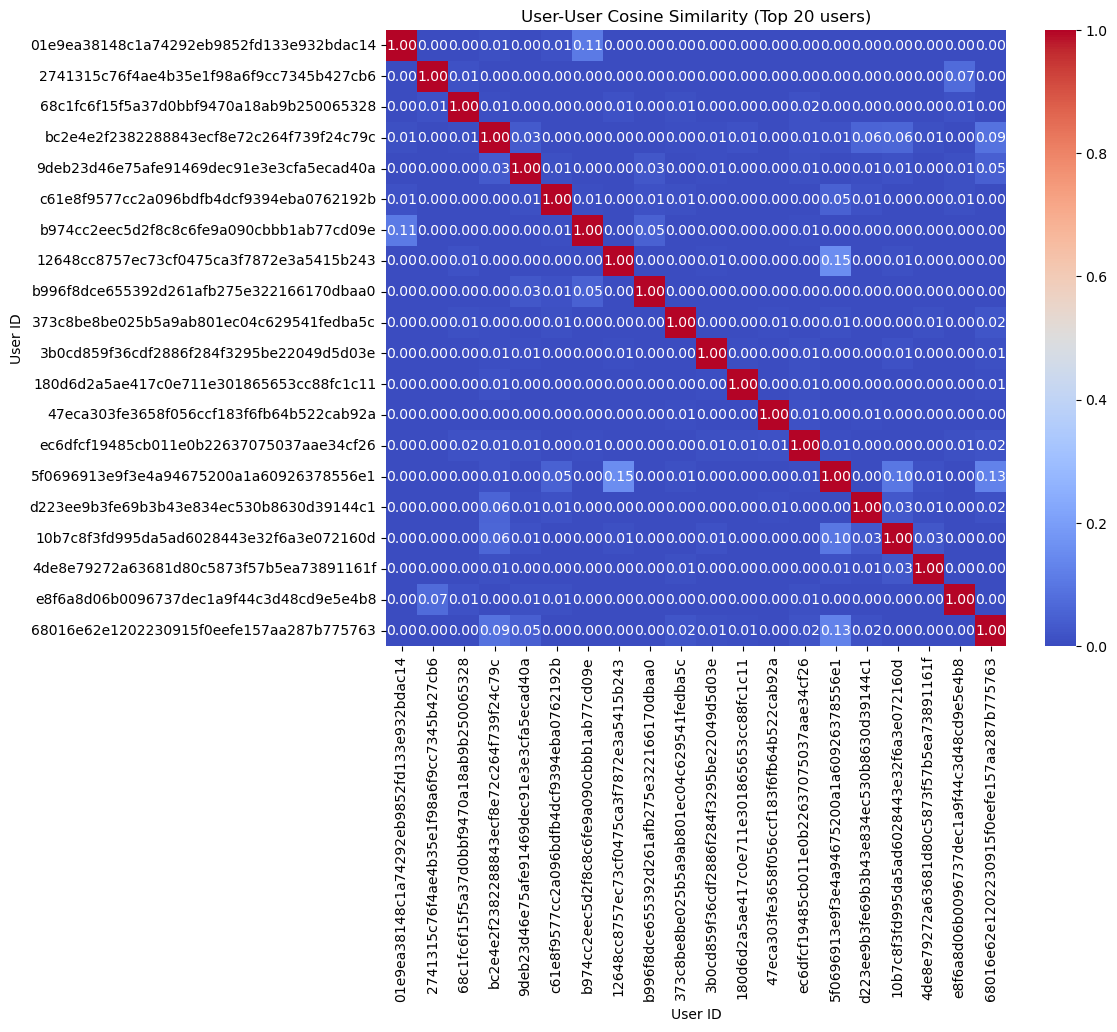

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize similarity between first 20 users
sample_sim = train_similarity_df.iloc[:20, :20]

plt.figure(figsize=(10, 8))
sns.heatmap(sample_sim, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("User-User Cosine Similarity (Top 20 users)")
plt.xlabel("User ID")
plt.ylabel("User ID")
plt.show()

# **Evaluation using Cosine Similarities** (User-based)

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score

def recommend_user_cf(user_id, user_item_matrix, similarity_df, top_k_users=10, top_n_items=10):
    if user_id not in similarity_df.index or user_id not in user_item_matrix.index:
        return []

    # Top-K most similar users
    similar_users = similarity_df.loc[user_id].drop(user_id).nlargest(top_k_users).index
    user_interactions = user_item_matrix.loc[user_id]
    already_seen = set(user_interactions[user_interactions > 0].index)

    candidate_scores = {}

    for sim_user in similar_users:
        similarity_score = similarity_df.loc[user_id, sim_user]
        sim_user_interactions = user_item_matrix.loc[sim_user]

        for track_id, playcount in sim_user_interactions.items():
            if playcount > 0 and track_id not in already_seen:
                candidate_scores[track_id] = candidate_scores.get(track_id, 0.0) + similarity_score * playcount

    # Sort and return top-N recommendations
    ranked_items = sorted(candidate_scores.items(), key=lambda x: x[1], reverse=True)
    return [track_id for track_id, _ in ranked_items[:top_n_items]]

In [63]:
# Import the standalone evaluation metrics
from standalone_evaluation_metrics import evaluate_recommendations, print_evaluation_summary

print("=== STANDALONE EVALUATION FRAMEWORK READY ===")
print("Standalone evaluation metrics imported successfully!")

=== STANDALONE EVALUATION FRAMEWORK READY ===
Standalone evaluation metrics imported successfully!


In [65]:
# ==============================================================================
# START OF EVALUATION CODE FOR USER-BASED CF
# Paste this entire block at the end of your script.
# ==============================================================================
print("\n" + "="*80)
print("RUNNING STANDALONE EVALUATION FOR USER-BASED COLLABORATIVE FILTERING")
print("="*80)

# Step 1: Prepare Mappings and Data for Evaluation
# ------------------------------------------------------------------------------
# The evaluation script requires specific variable names and data formats.
# We'll use the mappings created earlier in the script.
user_to_idx = all_user_ids
item_to_idx = all_track_ids
idx_to_user = {i: user for user, i in user_to_idx.items()}
idx_to_item = {i: item for item, i in item_to_idx.items()}

# Ensure the music metadata dataframe is available
music_df = music_list

print(f"Prepared mappings for {len(user_to_idx)} users and {len(item_to_idx)} items.")


# Step 2: Generate Recommendations for All Test Users
# ------------------------------------------------------------------------------
# We will loop through each user in the test set and generate recommendations.
test_users = test_df['user_id'].unique()
recommendations = {}

print("\nGenerating recommendations for all users via fast matrix multiplication...")

# Convert the pandas DataFrames to NumPy arrays for high-speed computation
similarity_matrix = train_similarity_df.to_numpy()
ratings_matrix = train_matrix.to_numpy()

# ==> THE CORE OPERATION <==
# Predict scores for all users on all items with a single matrix multiplication.
# Shape: (n_users, n_users) @ (n_users, n_items) -> (n_users, n_items)
predicted_scores = similarity_matrix @ ratings_matrix
print("Score prediction complete.")

# Mask already-seen items to prevent them from being recommended again
# We set the score of any item a user has already interacted with to negative infinity.
seen_mask = ratings_matrix > 0
predicted_scores[seen_mask] = -np.inf

# Get the top 20 item indices for every user efficiently
print("Finding top 20 recommendations for each user...")
N_RECS = 20
# Use argpartition to find the top N items without a full sort (much faster)
top_indices_unsorted = np.argpartition(predicted_scores, -N_RECS, axis=1)[:, -N_RECS:]

# Now, sort only the top N items for each user to get the correct ranking
top_scores = np.take_along_axis(predicted_scores, top_indices_unsorted, axis=1)
sort_order = np.argsort(top_scores, axis=1)[:, ::-1] # Sort in descending order
sorted_top_indices = np.take_along_axis(top_indices_unsorted, sort_order, axis=1)

# Create the final recommendations dictionary required by the evaluation script
print("Finalizing recommendations dictionary...")
recommendations = {}
test_users_set = set(test_df['user_id'].unique())

for user_id, user_idx in user_to_idx.items():
    if user_id in test_users_set:
        # Get the pre-computed top item indices for this user
        top_item_indices = sorted_top_indices[user_idx]
        recommendations[user_idx] = top_item_indices

print(f"Generated recommendations for {len(recommendations)} users in seconds.")


# Step 3: Prepare Item Content Features for Diversity & Serendipity
# ------------------------------------------------------------------------------
# We create a feature vector for each item based on which users interacted with it.
# This is required for the diversity and serendipity metrics.
print("\nPreparing item content features from the training matrix...")

# Transpose the train_matrix to get items as rows and users as columns
item_user_matrix = train_matrix.T

# Convert the sparse DataFrame to a dense NumPy array and L2-normalize it
item_content = item_user_matrix.to_numpy().astype(np.float32)
norms = np.linalg.norm(item_content, axis=1, keepdims=True) + 1e-12
item_content = item_content / norms

print(f"Item content features prepared with shape: {item_content.shape}")


# Step 4: Run the Comprehensive Evaluation
# ------------------------------------------------------------------------------
# Call the evaluation function with all the prepared data.
print("\nRunning evaluation with standalone metrics...")

evaluation_results = evaluate_recommendations(
    recommendations=recommendations,
    train_df=train_df,
    test_df=test_df,
    user_to_idx=user_to_idx,
    item_to_idx=item_to_idx,
    item_content=item_content,
    k_values=[5, 10, 15, 20],  # Evaluate at these recommendation list lengths
    metrics=[
        'ndcg', 
        'novelty', 
        'diversity', 
        'serendipity', 
        'catalog_coverage', 
        'user_coverage'
    ]
)


# Step 5: Print the Final Formatted Summary
# ------------------------------------------------------------------------------
# Display the results in a clean, readable format.
print_evaluation_summary(evaluation_results)
# ==============================================================================
# END OF EVALUATION CODE
# ==============================================================================


RUNNING STANDALONE EVALUATION FOR USER-BASED COLLABORATIVE FILTERING
Prepared mappings for 5000 users and 21087 items.

Generating recommendations for all users via fast matrix multiplication...
Score prediction complete.
Finding top 20 recommendations for each user...
Finalizing recommendations dictionary...
Generated recommendations for 5000 users in seconds.

Preparing item content features from the training matrix...
Item content features prepared with shape: (21087, 5000)

Running evaluation with standalone metrics...
Evaluating 5000 users across 4 k values...
  Calculating ndcg...
    ndcg@5: 0.1863
    ndcg@10: 0.1577
    ndcg@15: 0.1525
    ndcg@20: 0.1582
  Calculating novelty...
    novelty@5: 4.3696
    novelty@10: 4.4977
    novelty@15: 4.5785
    novelty@20: 4.6366
  Calculating diversity...
    diversity@5: 0.8526
    diversity@10: 0.8689
    diversity@15: 0.8815
    diversity@20: 0.8899
  Calculating serendipity...
    serendipity@5: 0.7474
    serendipity@10: 0.7628
  